In [2]:
!pip install fastf1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.8/148.8 kB 3.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 50.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.4 MB/s eta 0:00:00


In [32]:
# Importing required libraries
import fastf1
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import fastf1.plotting

In [33]:
# Load a specific race session (example: 2024, 7th race, race)
session = fastf1.get_session(2024, 7, 'R')
session.load()

# Extract telemetry data for the top ten drivers
top_drivers = ['VER', 'NOR', 'LEC', 'SAI', 'HAM', 'RUS', 'PIA', 'PER', 'ALO', 'STR']
driver_telemetry = []

for driver in top_drivers:
    driver_laps = session.laps.pick_driver(driver)
    telemetry = driver_laps.get_telemetry()
    telemetry['Driver'] = driver
    driver_telemetry.append(telemetry)

# Combine telemetry data for all drivers
data = pd.concat(driver_telemetry)

core           INFO 	Loading data for Emilia Romagna Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '16', '81', '55', '44', '63', '11', '18', '22', '27', '20', '3', '31', '24', '10', '2', '77', '14', '23']
/usr/local/lib/python3.10/dist-packages/fastf1/core.py:

In [34]:
session.event

RoundNumber                                                          7
Country                                                          Italy
Location                                                         Imola
OfficialEventName    FORMULA 1 MSC CRUISES GRAN PREMIO DEL MADE IN ...
EventDate                                          2024-05-19 00:00:00
EventName                                    Emilia Romagna Grand Prix
EventFormat                                               conventional
Session1                                                    Practice 1
Session1Date                                 2024-05-17 13:30:00+02:00
Session1DateUtc                                    2024-05-17 11:30:00
Session2                                                    Practice 2
Session2Date                                 2024-05-17 17:00:00+02:00
Session2DateUtc                                    2024-05-17 15:00:00
Session3                                                    Practice 3
Sessio

In [35]:
data.columns

Index(['Date', 'SessionTime', 'DriverAhead', 'DistanceToDriverAhead', 'Time',
       'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source',
       'Distance', 'RelativeDistance', 'Status', 'X', 'Y', 'Z', 'Driver'],
      dtype='object')

In [36]:
data

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z,Driver
2,2024-05-19 13:03:16.594,0 days 00:55:36.608000,,0.111111,0 days 00:00:00,10098,0,1,15,True,1,interpolation,0.002728,8.895927e-09,OnTrack,-3483.039335,-1694.000001,793.999999,VER
3,2024-05-19 13:03:16.675,0 days 00:55:36.689000,,0.111111,0 days 00:00:00.081000,10088,0,1,15,True,1,car,0.000000,0.000000e+00,OnTrack,-3483.107522,-1694.000003,793.999996,VER
4,2024-05-19 13:03:16.875,0 days 00:55:36.889000,,0.111111,0 days 00:00:00.281000,10059,0,1,15,True,1,car,0.000000,0.000000e+00,OnTrack,-3483.013049,-1694.000000,794.000000,VER
5,2024-05-19 13:03:16.884,0 days 00:55:36.898000,,0.111111,0 days 00:00:00.290000,9219,2,1,15,True,1,pos,0.003590,1.170713e-08,OnTrack,-3483.000000,-1694.000000,794.000000,VER
6,2024-05-19 13:03:17.204,0 days 00:55:37.218000,,0.111111,0 days 00:00:00.610000,8379,4,1,15,True,1,pos,0.448473,1.462567e-06,OnTrack,-3484.000000,-1694.000000,794.000000,VER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39586,2024-05-19 14:30:01.212,0 days 02:22:21.226000,,1230.013889,0 days 01:26:44.618000,11518,279,7,100,False,0,car,306159.279444,9.998668e-01,OnTrack,-1145.669797,-1590.879075,784.407121,STR
39587,2024-05-19 14:30:01.352,0 days 02:22:21.366000,,1230.013889,0 days 01:26:44.758000,11567,280,7,99,False,0,pos,306170.178948,9.999024e-01,OnTrack,-1251.000000,-1593.000000,785.000000,STR
39588,2024-05-19 14:30:01.492,0 days 02:22:21.506000,,1230.013889,0 days 01:26:44.898000,11617,281,7,99,False,0,car,306181.135000,9.999382e-01,OnTrack,-1345.277051,-1596.315430,784.965640,STR
39589,2024-05-19 14:30:01.571,0 days 02:22:21.585000,,1230.013889,0 days 01:26:44.977000,11652,282,7,99,False,0,pos,306187.346095,9.999585e-01,OnTrack,-1400.000000,-1599.000000,785.000000,STR


In [7]:
data['Acceleration'] = data['Speed'].diff().fillna(0) / data['Time'].diff().dt.total_seconds().fillna(1)
data['RelativeSpeed'] = data['Speed'] - data['DistanceToDriverAhead']
data['ControlIntensity'] = data['Throttle'] - data['Brake']
data['DeltaX'] = data['X'].diff()
data['DeltaY'] = data['Y'].diff()
data['DistanceTraveled'] = (data['DeltaX']**2 + data['DeltaY']**2)**0.5
data['GearChange'] = data['nGear'].diff().fillna(0)
data['RPMChange'] = data['RPM'].diff().fillna(0)

count    392605.000000
mean        213.436395
std          64.187079
min           0.000000
25%         159.000000
50%         221.000000
75%         267.000000
max         350.000000
Name: Speed, dtype: float64


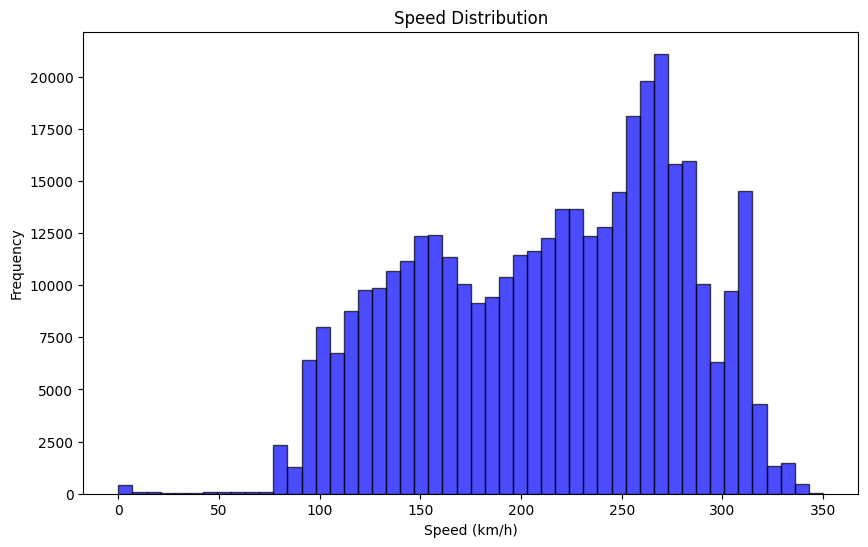

In [8]:
# Basic descriptive statistics
print(data['Speed'].describe())

# Plot histogram to visualize speed distribution
plt.figure(figsize=(10, 6))
data['Speed'].plot(kind='hist', bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Speed Distribution')
plt.xlabel('Speed (km/h)')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Segment the circuit into low-speed, mid-speed, and high-speed zones
# Define speed thresholds (example values, adjust based on track data)
data['SpeedCategory'] = pd.cut(data['Speed'], bins=[0, 80, 150, 300], labels=['Low-Speed', 'Mid-Speed', 'High-Speed'])

# Aggregate telemetry data by driver and speed category
segmented_features = data.groupby(['Driver', 'SpeedCategory']).agg(
    Speed_Mean=('Speed', 'mean'),
    Speed_Std=('Speed', 'std'),
    Throttle_Mean=('Throttle', 'mean'),
    Throttle_Std=('Throttle', 'std'),
    Brake_Mean=('Brake', 'mean'),
    Brake_Std=('Brake', 'std'),
    Gear_Mean=('nGear', 'mean'),
    Gear_Std=('nGear', 'std'),
    RPM_Mean=('RPM', 'mean'),
    RPM_Std=('RPM', 'std')
).reset_index()

# Pivot the table to make it driver-centric
pivot_data = segmented_features.pivot(index='Driver', columns='SpeedCategory', values=[
    'Speed_Mean', 'Speed_Std',
    'Throttle_Mean', 'Throttle_Std',
    'Brake_Mean', 'Brake_Std',
    'Gear_Mean', 'Gear_Std',
    'RPM_Mean', 'RPM_Std'
])

# Flatten multi-index columns for simplicity
pivot_data.columns = ['_'.join(col).strip() for col in pivot_data.columns.values]
pivot_data = pivot_data.reset_index()

# Fill any missing values (if a driver has no data for a speed category)
pivot_data = pivot_data.fillna(0)

# Define features (X) for clustering
X = pivot_data.drop(columns=['Driver'])

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<ipython-input-9-45d7250cfd33>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segmented_features = data.groupby(['Driver', 'SpeedCategory']).agg(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


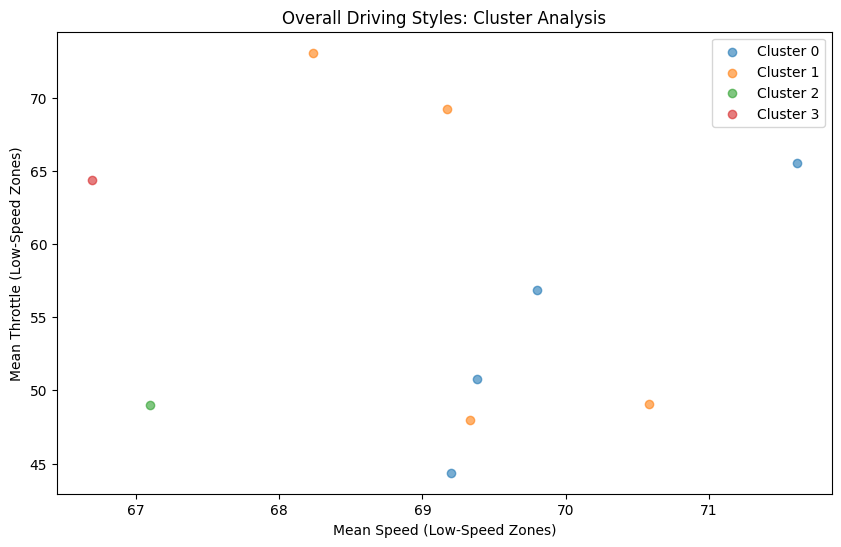

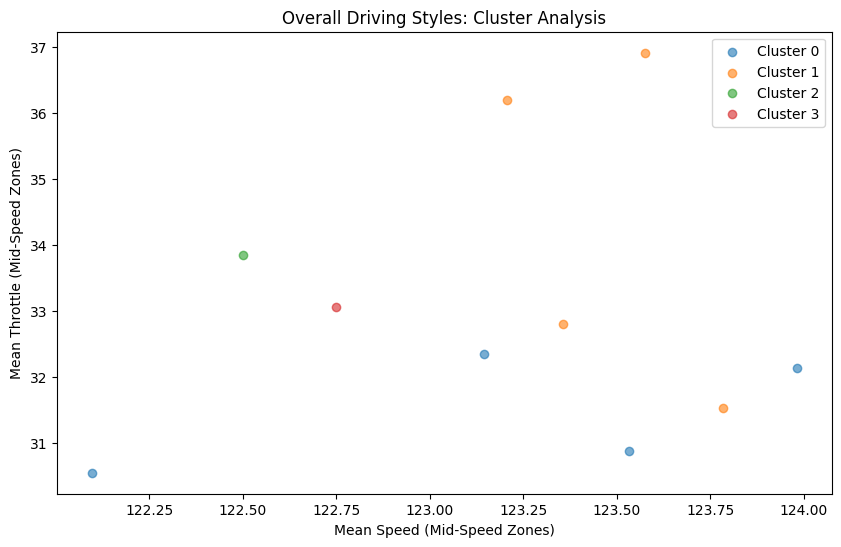

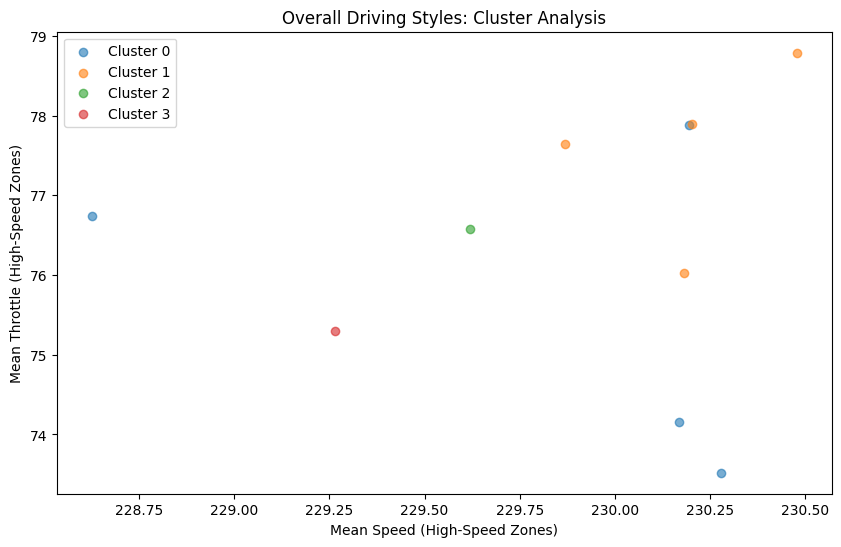

Cluster Centers (Overall Driving Styles):
   Speed_Mean_Low-Speed  Speed_Mean_Mid-Speed  Speed_Mean_High-Speed  \
0             69.998141            123.189291             229.816577   
1             69.330313            123.480542             230.182463   
2             67.095652            122.499942             229.618805   
3             66.693380            122.750578             229.263551   

   Speed_Std_Low-Speed  Speed_Std_Mid-Speed  Speed_Std_High-Speed  \
0            20.448018            17.437415             41.606472   
1            21.146425            17.012972             41.458695   
2            24.549024            18.182811             41.032099   
3            20.563480            18.126536             41.986583   

   Throttle_Mean_Low-Speed  Throttle_Mean_Mid-Speed  Throttle_Mean_High-Speed  \
0                54.389618                31.472226                 75.573779   
1                59.848074                34.355977                 77.587350   
2       

In [10]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
pivot_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters (Driver-level analysis)
plt.figure(figsize=(10, 6))
for cluster in range(4):
    cluster_data = pivot_data[pivot_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Speed_Mean_Low-Speed'], cluster_data['Throttle_Mean_Low-Speed'], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Mean Speed (Low-Speed Zones)')
plt.ylabel('Mean Throttle (Low-Speed Zones)')
plt.title('Overall Driving Styles: Cluster Analysis')
plt.legend()
plt.show()

# Visualize clusters (Driver-level analysis)
plt.figure(figsize=(10, 6))
for cluster in range(4):
    cluster_data = pivot_data[pivot_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Speed_Mean_Mid-Speed'], cluster_data['Throttle_Mean_Mid-Speed'], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Mean Speed (Mid-Speed Zones)')
plt.ylabel('Mean Throttle (Mid-Speed Zones)')
plt.title('Overall Driving Styles: Cluster Analysis')
plt.legend()
plt.show()

# Visualize clusters (Driver-level analysis)
plt.figure(figsize=(10, 6))
for cluster in range(4):
    cluster_data = pivot_data[pivot_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Speed_Mean_High-Speed'], cluster_data['Throttle_Mean_High-Speed'], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Mean Speed (High-Speed Zones)')
plt.ylabel('Mean Throttle (High-Speed Zones)')
plt.title('Overall Driving Styles: Cluster Analysis')
plt.legend()
plt.show()


# Analyze cluster centers
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)
cluster_centers['Cluster'] = cluster_centers.index

print("Cluster Centers (Overall Driving Styles):")
print(cluster_centers)

# List drivers in each cluster
drivers_in_clusters = pivot_data[['Driver', 'Cluster']]
print("\nDrivers in each cluster:")
for cluster in range(4):
    cluster_drivers = drivers_in_clusters[drivers_in_clusters['Cluster'] == cluster]['Driver'].unique()
    print(f"Cluster {cluster}: {', '.join(cluster_drivers)}")

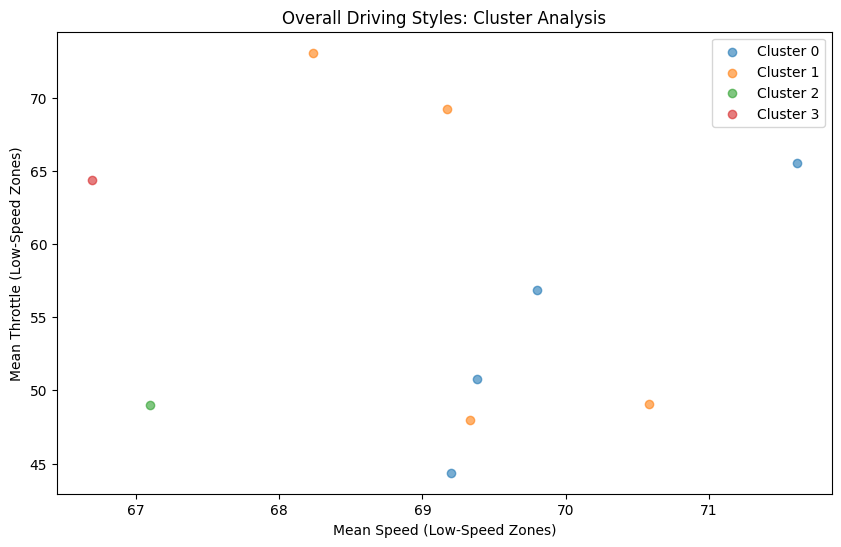

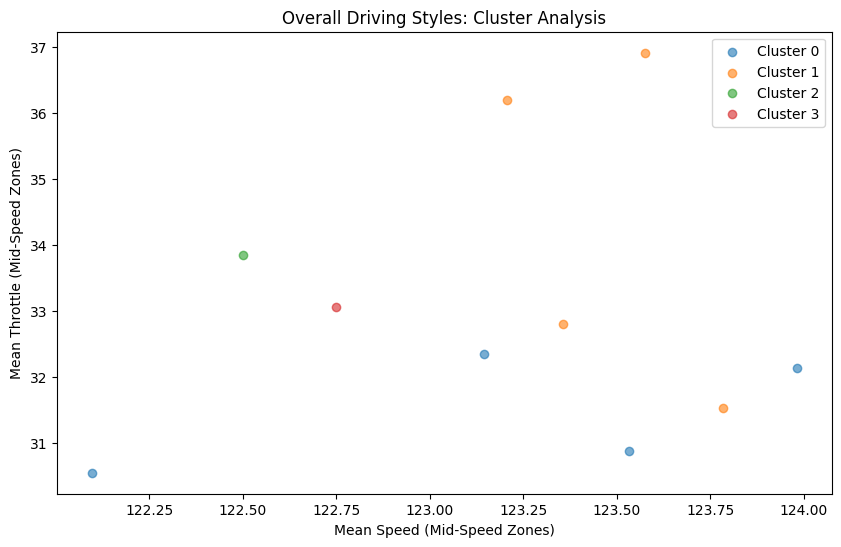

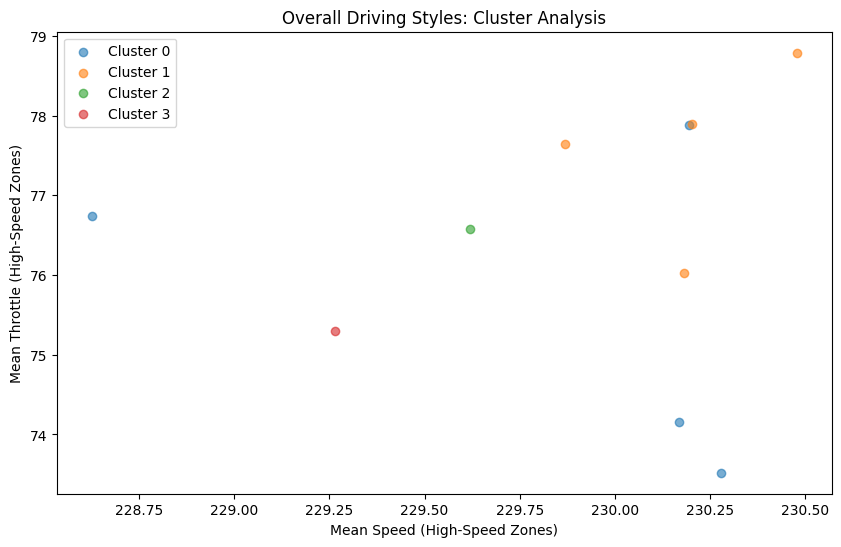

In [11]:
# Visualize clusters (Driver-level analysis)
plt.figure(figsize=(10, 6))
for cluster in range(4):
    cluster_data = pivot_data[pivot_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Speed_Mean_Low-Speed'], cluster_data['Throttle_Mean_Low-Speed'], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Mean Speed (Low-Speed Zones)')
plt.ylabel('Mean Throttle (Low-Speed Zones)')
plt.title('Overall Driving Styles: Cluster Analysis')
plt.legend()
plt.show()

# Visualize clusters (Driver-level analysis)
plt.figure(figsize=(10, 6))
for cluster in range(4):
    cluster_data = pivot_data[pivot_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Speed_Mean_Mid-Speed'], cluster_data['Throttle_Mean_Mid-Speed'], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Mean Speed (Mid-Speed Zones)')
plt.ylabel('Mean Throttle (Mid-Speed Zones)')
plt.title('Overall Driving Styles: Cluster Analysis')
plt.legend()
plt.show()

# Visualize clusters (Driver-level analysis)
plt.figure(figsize=(10, 6))
for cluster in range(4):
    cluster_data = pivot_data[pivot_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Speed_Mean_High-Speed'], cluster_data['Throttle_Mean_High-Speed'], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Mean Speed (High-Speed Zones)')
plt.ylabel('Mean Throttle (High-Speed Zones)')
plt.title('Overall Driving Styles: Cluster Analysis')
plt.legend()
plt.show()

In [12]:
# Analyze cluster centers
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)
cluster_centers['Cluster'] = cluster_centers.index

print("Cluster Centers (Overall Driving Styles):")
print(cluster_centers)

# List drivers in each cluster
drivers_in_clusters = pivot_data[['Driver', 'Cluster']]
print("\nDrivers in each cluster:")
for cluster in range(4):
    cluster_drivers = drivers_in_clusters[drivers_in_clusters['Cluster'] == cluster]['Driver'].unique()
    print(f"Cluster {cluster}: {', '.join(cluster_drivers)}")

Cluster Centers (Overall Driving Styles):
   Speed_Mean_Low-Speed  Speed_Mean_Mid-Speed  Speed_Mean_High-Speed  \
0             69.998141            123.189291             229.816577   
1             69.330313            123.480542             230.182463   
2             67.095652            122.499942             229.618805   
3             66.693380            122.750578             229.263551   

   Speed_Std_Low-Speed  Speed_Std_Mid-Speed  Speed_Std_High-Speed  \
0            20.448018            17.437415             41.606472   
1            21.146425            17.012972             41.458695   
2            24.549024            18.182811             41.032099   
3            20.563480            18.126536             41.986583   

   Throttle_Mean_Low-Speed  Throttle_Mean_Mid-Speed  Throttle_Mean_High-Speed  \
0                54.389618                31.472226                 75.573779   
1                59.848074                34.355977                 77.587350   
2       

In [13]:
race = fastf1.get_session(2024, 7, 'R')
race.load()
laps = race.laps.pick_quicklaps()

drivers = session.drivers
drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]
print(drivers)

stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()
stints = stints.rename(columns={"LapNumber": "StintLength"})

core           INFO 	Loading data for Emilia Romagna Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '16', '81', '55', '44', '63', '11', '18', '22', '27', '20', '3', '31', '24', '10', '2', '77', '14', '23']


['VER', 'NOR', 'LEC', 'PIA', 'SAI', 'HAM', 'RUS', 'PER', 'STR', 'TSU', 'HUL', 'MAG', 'RIC', 'OCO', 'ZHO', 'GAS', 'SAR', 'BOT', 'ALO', 'ALB']


In [23]:
laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:56:59.772000,VER,1,0 days 00:01:22.881000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:27.949000,...,True,Red Bull Racing,0 days 00:55:36.608000,2024-05-19 13:03:16.594,1,1.0,False,,False,False
1,0 days 00:58:20.368000,VER,1,0 days 00:01:20.596000,2.0,1.0,NaT,NaT,0 days 00:00:25.604000,0 days 00:00:27.925000,...,True,Red Bull Racing,0 days 00:56:59.772000,2024-05-19 13:04:39.758,1,1.0,False,,False,True
2,0 days 00:59:41.240000,VER,1,0 days 00:01:20.872000,3.0,1.0,NaT,NaT,0 days 00:00:25.743000,0 days 00:00:28.104000,...,True,Red Bull Racing,0 days 00:58:20.368000,2024-05-19 13:06:00.354,1,1.0,False,,False,True
3,0 days 01:01:01.911000,VER,1,0 days 00:01:20.671000,4.0,1.0,NaT,NaT,0 days 00:00:25.651000,0 days 00:00:27.991000,...,True,Red Bull Racing,0 days 00:59:41.240000,2024-05-19 13:07:21.226,1,1.0,False,,False,True
4,0 days 01:02:22.645000,VER,1,0 days 00:01:20.734000,5.0,1.0,NaT,NaT,0 days 00:00:25.602000,0 days 00:00:28.041000,...,True,Red Bull Racing,0 days 01:01:01.911000,2024-05-19 13:08:41.897,1,1.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,0 days 02:01:45.916000,ALB,23,0 days 00:01:21.331000,46.0,5.0,NaT,NaT,0 days 00:00:25.685000,0 days 00:00:28.511000,...,False,Williams,0 days 02:00:24.585000,2024-05-19 14:08:04.571,1,20.0,False,,False,True
1233,0 days 02:03:07.263000,ALB,23,0 days 00:01:21.347000,47.0,5.0,NaT,NaT,0 days 00:00:25.652000,0 days 00:00:28.493000,...,False,Williams,0 days 02:01:45.916000,2024-05-19 14:09:25.902,1,20.0,False,,False,True
1234,0 days 02:04:28.537000,ALB,23,0 days 00:01:21.274000,48.0,5.0,NaT,NaT,0 days 00:00:25.553000,0 days 00:00:28.534000,...,False,Williams,0 days 02:03:07.263000,2024-05-19 14:10:47.249,1,20.0,False,,False,True
1235,0 days 02:05:52.356000,ALB,23,0 days 00:01:23.819000,49.0,5.0,NaT,NaT,0 days 00:00:25.724000,0 days 00:00:28.633000,...,False,Williams,0 days 02:04:28.537000,2024-05-19 14:12:08.523,1,20.0,False,,False,True


In [24]:
laps.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

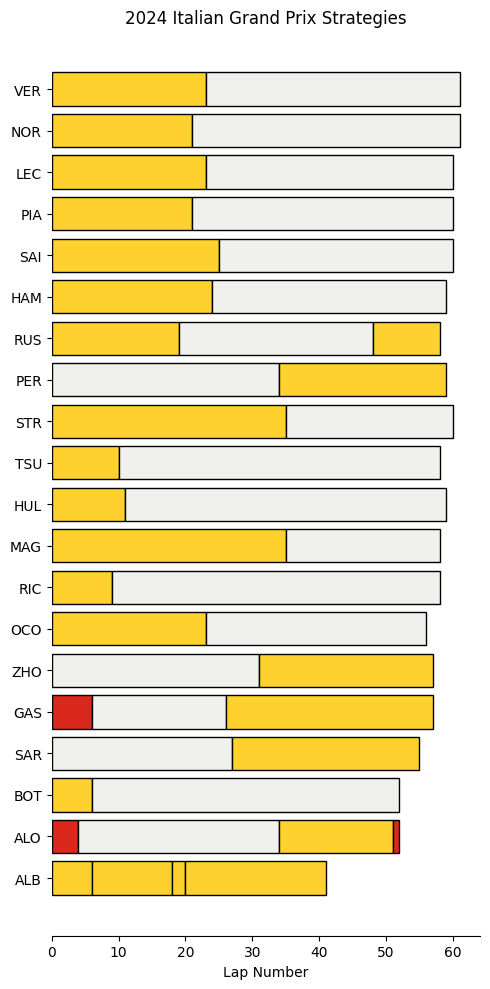

In [14]:
fig, ax = plt.subplots(figsize=(5, 10))

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        compound_color = fastf1.plotting.get_compound_color(row["Compound"],
                                                            session=session)
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=compound_color,
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]
        
plt.title("2024 Italian Grand Prix Strategies")
plt.xlabel("Lap Number")
plt.grid(False)
# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


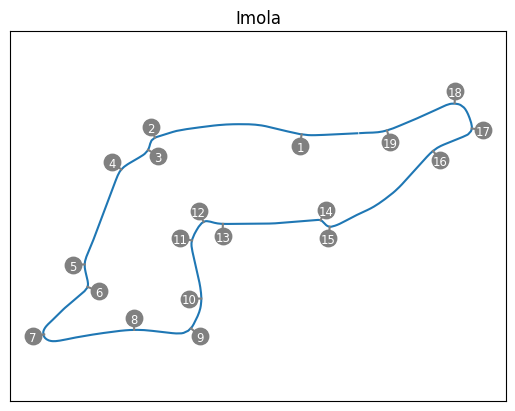

In [15]:
# Additional Analysis: Visualizing Corners on Track
# Load the circuit information for visualization
lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

# Get an array of shape [n, 2] where n is the number of points and the second axis is x and y.
track = pos.loc[:, ('X', 'Y')].to_numpy()

# Define rotation angle (example: align with north)
track_angle = 0  # Adjust if circuit_info.rotation is available

def rotate(point, angle):
    """Rotate a point or set of points around the origin."""
    x, y = point
    cos_theta, sin_theta = np.cos(angle), np.sin(angle)
    x_rot = x * cos_theta - y * sin_theta
    y_rot = x * sin_theta + y * cos_theta
    return x_rot, y_rot

# Rotate and plot the track map
rotated_track = np.array([rotate((x, y), track_angle) for x, y in track])
plt.plot(rotated_track[:, 0], rotated_track[:, 1])

# Iterate over all corners (example: mock corner data, replace with actual circuit_info)
circuit_info = session.get_circuit_info()
for _, corner in circuit_info.corners.iterrows():
    # Create a string from corner number and letter
    txt = f"{corner['Number']}{corner['Letter']}"

    # Convert the angle from degrees to radian
    offset_vector = [500, 0]  # arbitrary offset
    offset_angle = corner['Angle'] / 180 * np.pi
    offset_x, offset_y = rotate(offset_vector, angle=offset_angle)

    # Add the offset to the position of the corner
    text_x = corner['X'] + offset_x
    text_y = corner['Y'] + offset_y

    # Rotate the text position equivalently to the rest of the track map
    text_x, text_y = rotate([text_x, text_y], angle=track_angle)
    track_x, track_y = rotate([corner['X'], corner['Y']], angle=track_angle)

    # Draw a circle next to the track
    plt.scatter(text_x, text_y, color='grey', s=140)

    # Draw a line from the track to this circle
    plt.plot([track_x, text_x], [track_y, text_y], color='grey')

    # Finally, print the corner number inside the circle
    plt.text(text_x, text_y, txt, va='center_baseline', ha='center', size='small', color='white')

plt.title(session.event['Location'])
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()


core           INFO 	Loading data for Emilia Romagna Grand Prix - Qualifying [v3.4.4]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req          

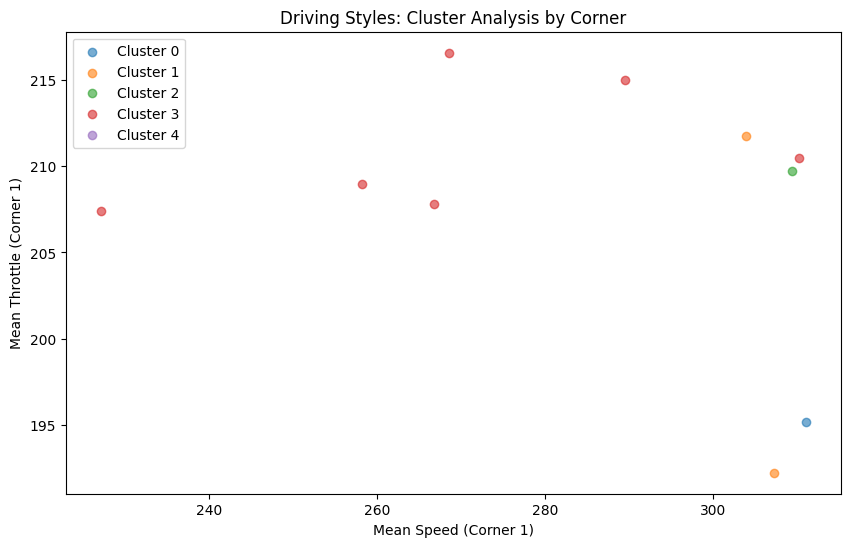

Cluster Centers (Driving Styles by Corner):
   Speed_Mean_1  Speed_Mean_10  Speed_Mean_11  Speed_Mean_12  Speed_Mean_13  \
0    311.000000     195.200000     201.200000     115.352941     139.157895   
1    305.562500     202.002353     212.655625     136.226891     145.961538   
2    309.333333     209.730769     207.032258     126.826923     145.809524   
3    270.036417     211.035119     211.240733     126.044993     146.906945   

   Speed_Mean_14  Speed_Mean_15  Speed_Mean_16  Speed_Mean_17  Speed_Mean_18  \
0     102.882353      83.761905     253.818182     101.480000     132.714286   
1     117.198718      95.921705     231.892727     122.893939     139.812997   
2     117.285714      94.516667     222.315789     117.425532     139.666667   
3     108.466074      88.064461     252.987894     113.901698     140.871260   

   ...   RPM_Mean_19    RPM_Mean_2    RPM_Mean_3    RPM_Mean_4    RPM_Mean_5  \
0  ...  11263.500000  10102.428571  10036.666667  10674.222222  10246.666667   

In [16]:
# Load a specific race session (example: 2024, 7th race, qualifying)
session = fastf1.get_session(2024, 7, 'Q')
session.load()

# Extract telemetry data for the top ten drivers
top_drivers = ['VER', 'NOR', 'LEC', 'SAI', 'HAM', 'RUS', 'PIA', 'PER', 'ALO', 'STR']
driver_telemetry = []

for driver in top_drivers:
    driver_laps = session.laps.pick_driver(driver)
    telemetry = driver_laps.get_telemetry()
    telemetry['Driver'] = driver
    driver_telemetry.append(telemetry)

# Combine telemetry data for all drivers
data = pd.concat(driver_telemetry)

# Load the circuit information for corner analysis
circuit_info = session.get_circuit_info()
corners = circuit_info.corners

# Map telemetry data to specific corners based on proximity
corner_data = []
for _, corner in corners.iterrows():
    corner_name = f"{corner['Number']}{corner['Letter']}"
    corner_pos = np.array([corner['X'], corner['Y']])

    # Calculate the distance from each telemetry point to the corner
    data['DistanceToCorner'] = np.sqrt((data['X'] - corner['X'])**2 + (data['Y'] - corner['Y'])**2)

    # Assign telemetry points to the corner if within a threshold distance (e.g., 50 meters)
    corner_telemetry = data[data['DistanceToCorner'] < 50].copy()
    corner_telemetry['Corner'] = corner_name
    corner_data.append(corner_telemetry)

# Combine all corner-specific telemetry data
corner_data = pd.concat(corner_data)

# Aggregate telemetry data by driver and corner
corner_features = corner_data.groupby(['Driver', 'Corner']).agg(
    Speed_Mean=('Speed', 'mean'),
    Throttle_Mean=('Throttle', 'mean'),
    Brake_Mean=('Brake', 'mean'),
    Gear_Mean=('nGear', 'mean'),
    RPM_Mean=('RPM', 'mean')
).reset_index()

# Pivot the table to make it driver-centric
corner_pivot = corner_features.pivot(index='Driver', columns='Corner', values=[
    'Speed_Mean', 'Throttle_Mean', 'Brake_Mean', 'Gear_Mean', 'RPM_Mean'
])

# Flatten multi-index columns for simplicity
corner_pivot.columns = ['_'.join(col).strip() for col in corner_pivot.columns.values]
corner_pivot = corner_pivot.reset_index()

# Fill any missing values (if a driver has no data for a corner)
corner_pivot = corner_pivot.fillna(0)

# Define features (X) for clustering
X = corner_pivot.drop(columns=['Driver'])

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
corner_pivot['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters (Driver-level analysis by corner)
plt.figure(figsize=(10, 6))
for cluster in range(5):
    cluster_data = corner_pivot[corner_pivot['Cluster'] == cluster]
    plt.scatter(cluster_data.iloc[:, 1], cluster_data.iloc[:, 2], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Mean Speed (Corner 1)')
plt.ylabel('Mean Throttle (Corner 1)')
plt.title('Driving Styles: Cluster Analysis by Corner')
plt.legend()
plt.show()

# Analyze cluster centers
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)
cluster_centers['Cluster'] = cluster_centers.index

print("Cluster Centers (Driving Styles by Corner):")
print(cluster_centers)

# List drivers in each cluster
drivers_in_clusters = corner_pivot[['Driver', 'Cluster']]
print("\nDrivers in each cluster:")
for cluster in range(4):
    cluster_drivers = drivers_in_clusters[drivers_in_clusters['Cluster'] == cluster]['Driver'].unique()
    print(f"Cluster {cluster}: {', '.join(cluster_drivers)}")


<ipython-input-85-e6cb93c1bdc1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps['LapTime'] = pd.to_timedelta(laps['LapTime'])
<ipython-input-85-e6cb93c1bdc1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps['Sector1Time'] = pd.to_timedelta(laps['Sector1Time'])
<ipython-input-85-e6cb93c1bdc1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

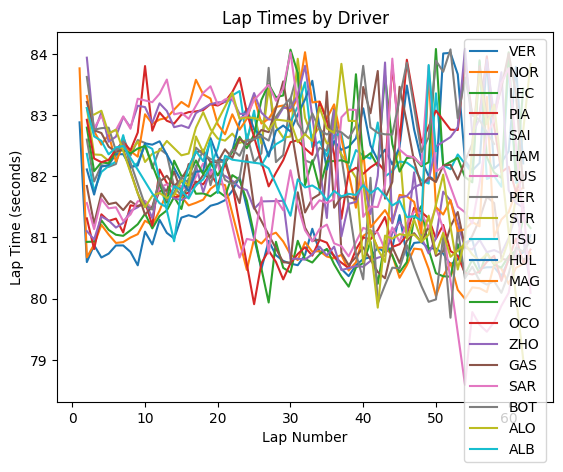


Pit Strategy Analysis:
Empty DataFrame
Columns: [count, mean, std, min, 25%, 50%, 75%, max]
Index: []


<ipython-input-85-e6cb93c1bdc1>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps['PitDuration'] = laps['PitInTime'] - laps['PitOutTime']


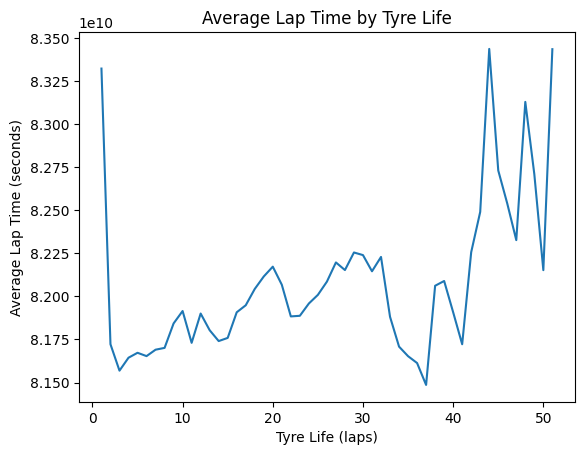


Personal Best Sectors:
     Driver            Sector1Time            Sector2Time  \
1       VER 0 days 00:00:25.604000 0 days 00:00:27.925000   
8       VER 0 days 00:00:25.629000 0 days 00:00:27.978000   
23      VER 0 days 00:00:25.444000 0 days 00:00:28.057000   
35      VER 0 days 00:00:25.301000 0 days 00:00:28.086000   
62      NOR 0 days 00:00:25.691000 0 days 00:00:28.003000   
...     ...                    ...                    ...   
1107    ALB 0 days 00:00:25.749000 0 days 00:00:28.450000   
1108    ALB 0 days 00:00:25.706000 0 days 00:00:28.457000   
1120    ALB 0 days 00:00:25.384000 0 days 00:00:28.574000   
1136    ALB 0 days 00:00:25.685000 0 days 00:00:28.511000   
1138    ALB 0 days 00:00:25.553000 0 days 00:00:28.534000   

                Sector3Time  
1    0 days 00:00:27.067000  
8    0 days 00:00:26.936000  
23   0 days 00:00:26.981000  
35   0 days 00:00:26.979000  
62   0 days 00:00:26.979000  
...                     ...  
1107 0 days 00:00:27.359000  
110

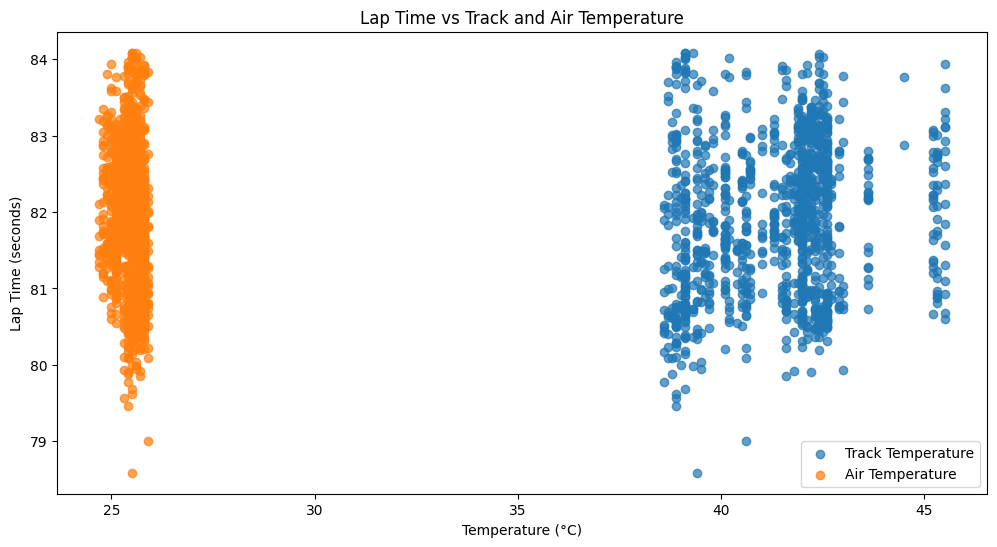

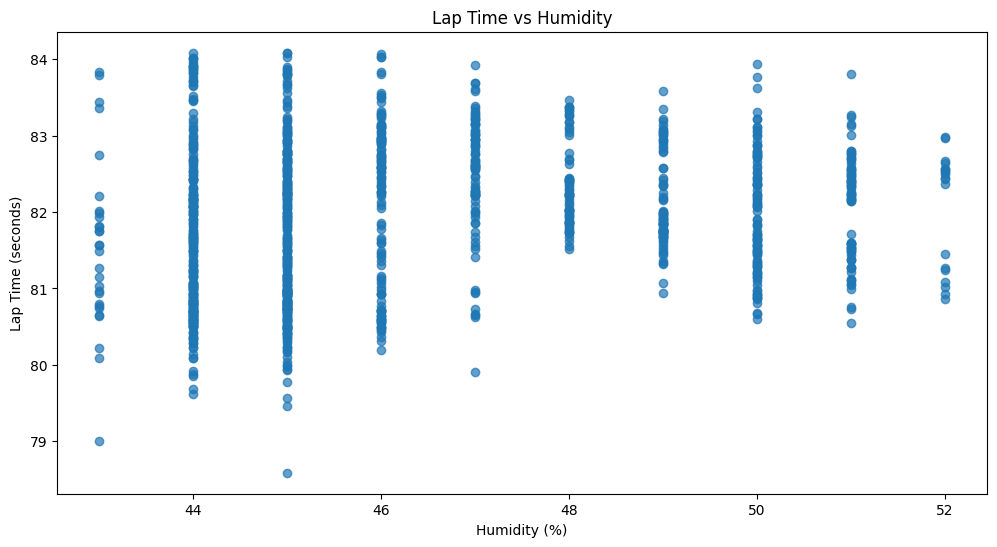

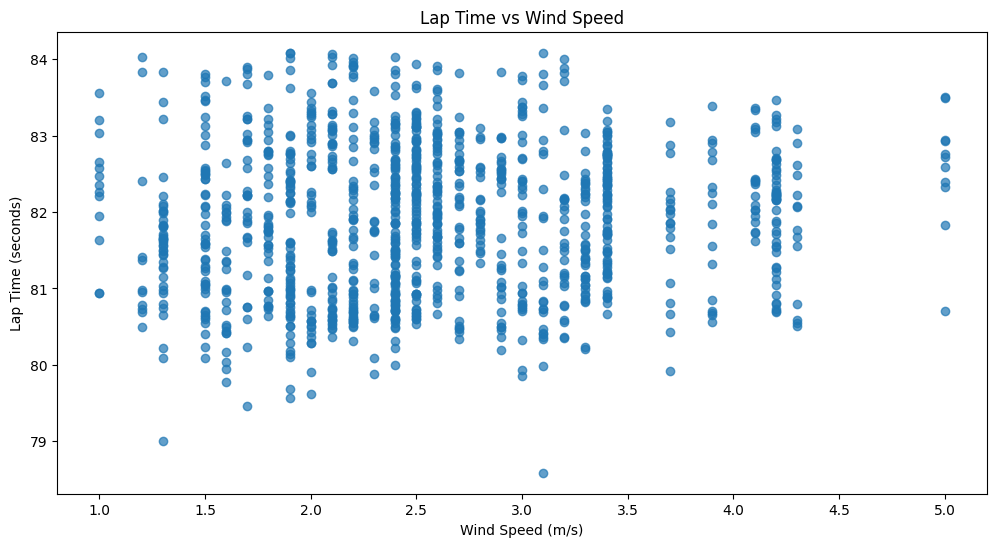

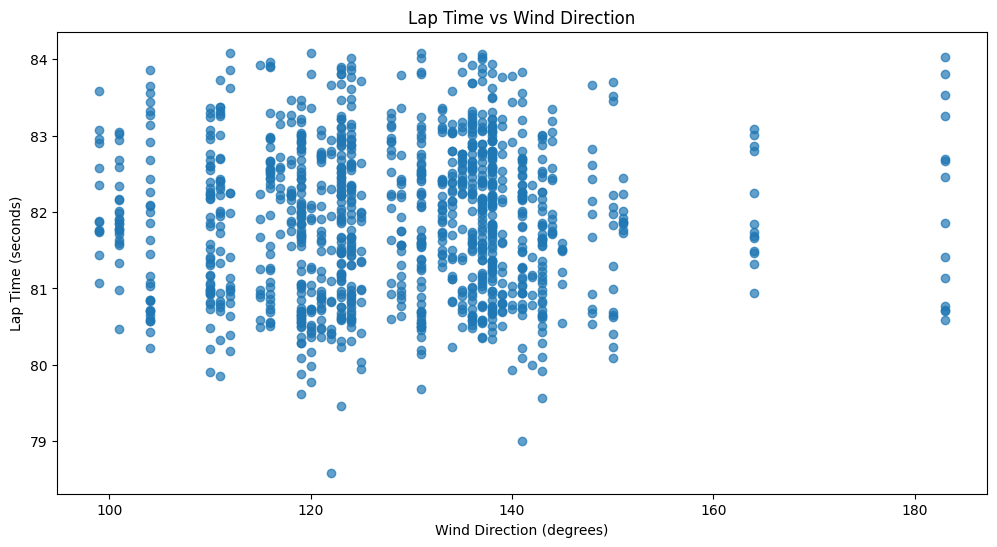

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data structure assumed for the `laps` dataframe
# laps.columns: ['Time', 'Driver', 'LapTime', 'LapNumber', 'Sector1Time', 'Sector2Time', 'Sector3Time', 
#                'PitOutTime', 'PitInTime', 'TyreLife', 'IsPersonalBest']
# Example data structure assumed for the `weather` dataframe
# weather.columns: ['Time', 'AirTemp', 'Humidity', 'TrackTemp', 'WindDirection', 'WindSpeed']

# Step 1: Lap Consistency
# Convert LapTime and sector times to timedelta for numerical operations
laps['LapTime'] = pd.to_timedelta(laps['LapTime'])
laps['Sector1Time'] = pd.to_timedelta(laps['Sector1Time'])
laps['Sector2Time'] = pd.to_timedelta(laps['Sector2Time'])
laps['Sector3Time'] = pd.to_timedelta(laps['Sector3Time'])

# Calculate the total time per lap and analyze consistency
laps['TotalSectorTime'] = laps['Sector1Time'] + laps['Sector2Time'] + laps['Sector3Time']
laps['ConsistencyGap'] = laps['LapTime'] - laps['TotalSectorTime']

# Plot lap times for each driver
for driver in laps['Driver'].unique():
    driver_laps = laps[laps['Driver'] == driver]
    plt.plot(driver_laps['LapNumber'], driver_laps['LapTime'].dt.total_seconds(), label=driver)

plt.title('Lap Times by Driver')
plt.xlabel('Lap Number')
plt.ylabel('Lap Time (seconds)')
plt.legend()
plt.show()

# Step 2: Pit Strategy Analysis
# Analyze pit stop windows based on PitOutTime and PitInTime
laps['PitDuration'] = laps['PitInTime'] - laps['PitOutTime']
pit_analysis = laps[laps['PitOutTime'].notnull()]

# Summary statistics for pit durations
pit_summary = pit_analysis.groupby('Driver')['PitDuration'].describe()
print("\nPit Strategy Analysis:")
print(pit_summary)

# Tyre performance based on TyreLife
tyre_life_analysis = laps.groupby('TyreLife')['LapTime'].mean().sort_index()
tyre_life_analysis.plot(title='Average Lap Time by Tyre Life', xlabel='Tyre Life (laps)', ylabel='Average Lap Time (seconds)')
plt.show()

# Step 3: Personal Best Sectors
# Identify personal best times for each sector
pb_sectors = laps[laps['IsPersonalBest'] == True][['Driver', 'Sector1Time', 'Sector2Time', 'Sector3Time']]
print("\nPersonal Best Sectors:")
print(pb_sectors)

# Highlight personal bests in a table
for driver in pb_sectors['Driver'].unique():
    driver_pb = pb_sectors[pb_sectors['Driver'] == driver]
    print(f"\nPersonal Best Sectors for {driver}:")
    print(driver_pb)

# Step 4: Track and Weather Insights
# Merge weather data with laps based on time proximity
laps_weather = pd.merge_asof(laps.sort_values('Time'), weather_data.sort_values('Time'), on='Time')

# Analyze impact of track conditions on lap performance
plt.figure(figsize=(12, 6))
plt.scatter(laps_weather['TrackTemp'], laps_weather['LapTime'].dt.total_seconds(), alpha=0.7, label='Track Temperature')
plt.scatter(laps_weather['AirTemp'], laps_weather['LapTime'].dt.total_seconds(), alpha=0.7, label='Air Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Lap Time (seconds)')
plt.title('Lap Time vs Track and Air Temperature')
plt.legend()
plt.show()

# Analyze impact of humidity on lap performance
plt.figure(figsize=(12, 6))
plt.scatter(laps_weather['Humidity'], laps_weather['LapTime'].dt.total_seconds(), alpha=0.7, label='Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Lap Time (seconds)')
plt.title('Lap Time vs Humidity')
plt.show()

# Wind Analysis
plt.figure(figsize=(12, 6))
plt.scatter(laps_weather['WindSpeed'], laps_weather['LapTime'].dt.total_seconds(), alpha=0.7, label='Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Lap Time (seconds)')
plt.title('Lap Time vs Wind Speed')
plt.show()

# Analyze wind direction impact on specific sectors or corners
plt.figure(figsize=(12, 6))
plt.scatter(laps_weather['WindDirection'], laps_weather['LapTime'].dt.total_seconds(), alpha=0.7, label='Wind Direction')
plt.xlabel('Wind Direction (degrees)')
plt.ylabel('Lap Time (seconds)')
plt.title('Lap Time vs Wind Direction')
plt.show()


Average Lap and Sector Times by Tyre Compound:
                           LapTime               Sector1Time  \
Compound                                                       
HARD     0 days 00:01:21.852464767 0 days 00:00:25.871758620   
MEDIUM   0 days 00:01:21.959963282 0 days 00:00:25.882123644   
SOFT     0 days 00:01:22.412454545 0 days 00:00:25.879727272   

                       Sector2Time               Sector3Time  
Compound                                                      
HARD     0 days 00:00:28.545823088 0 days 00:00:27.434883058  
MEDIUM   0 days 00:00:28.566721382 0 days 00:00:27.500967602  
SOFT     0 days 00:00:28.826363636 0 days 00:00:27.706363636  


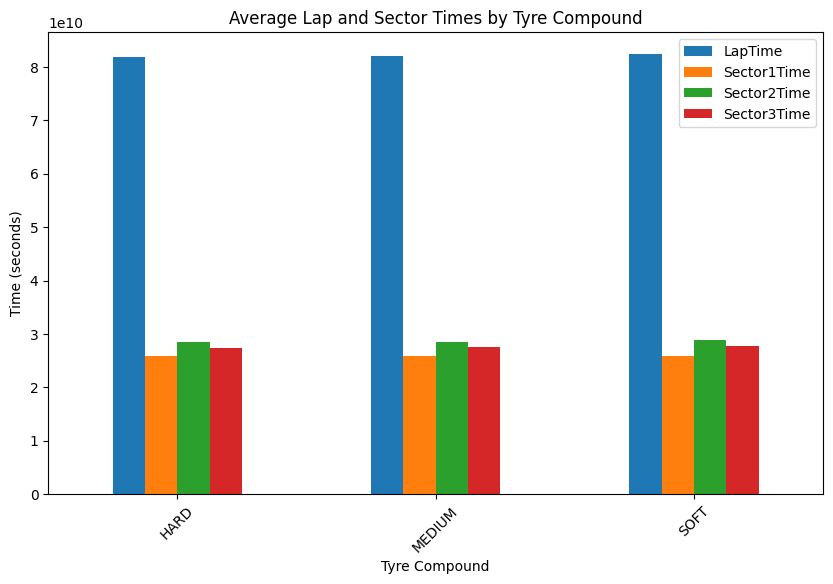

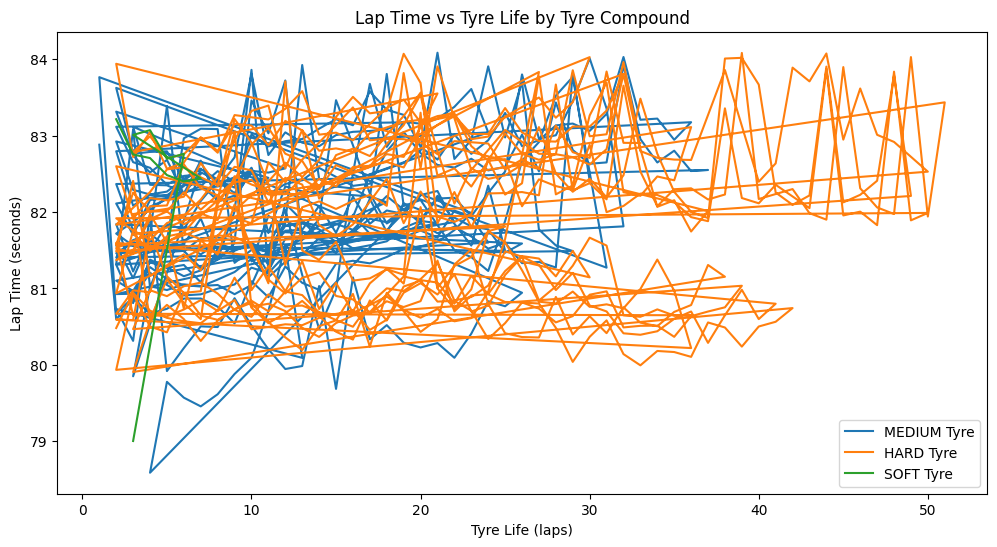

In [87]:
# Step 6: Tyre Strategy
# Tyre Compound Effectiveness
compound_effectiveness = laps.groupby('Compound')[['LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time']].mean()
print("\nAverage Lap and Sector Times by Tyre Compound:")
print(compound_effectiveness)

compound_effectiveness.plot(kind='bar', figsize=(10, 6))
plt.title('Average Lap and Sector Times by Tyre Compound')
plt.xlabel('Tyre Compound')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Tyre Management
plt.figure(figsize=(12, 6))
for compound in laps['Compound'].unique():
    compound_data = laps[laps['Compound'] == compound]
    plt.plot(compound_data['TyreLife'], compound_data['LapTime'].dt.total_seconds(), label=f'{compound} Tyre')

plt.xlabel('Tyre Life (laps)')
plt.ylabel('Lap Time (seconds)')
plt.title('Lap Time vs Tyre Life by Tyre Compound')
plt.legend()
plt.show()


In [92]:
import pandas as pd

# Assuming `data`, `weather_data`, and `laps` are already loaded as DataFrames.

# Step 1: Convert time-related columns to datetime for merging
data['Time'] = pd.to_timedelta(data['Time'])
weather_data['Time'] = pd.to_timedelta(weather_data['Time'])
laps['LapStartTime'] = pd.to_timedelta(laps['LapStartTime'])

# Step 2: Merge `data` with `laps` on the closest timestamp
# Since there isn't a direct match column, we'll use pd.merge_asof
data = data.sort_values(by='Time')
laps = laps.sort_values(by='LapStartTime')
combined_data = pd.merge_asof(data, laps, left_on='Time', right_on='LapStartTime', direction='backward')

# Step 3: Merge the result with `weather_data`
weather_data = weather_data.sort_values(by='Time')
final_combined_data = pd.merge_asof(combined_data, weather_data, left_on='Time', right_on='Time', direction='backward')

# Step 4: Inspect the final combined data
print(final_combined_data.head())


KeyError: 'Time'